In [23]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from scipy.io import wavfile

 Ejercicio 1 - Generación de señales 
 ---------------

Generaremos muestras a partir de la siguiente señal continua

\begin{equation}
    \label{x}
    x(t) = \sin(2\pi f_0 t) + \cos(2\pi f_1 t)
\end{equation}



donde  $f_0 = 2$Hz y $f_1 = 3f_0$.

**1.1** Implemente una función  def $x(t)$   que devuelve los valores de $x(t)$ de una lista de valores en formato numpy.

In [24]:
f0 = 2
f1 = 3*f0

def x(t):
    return np.sin(2*np.pi*f0*t)+np.cos(2*np.pi*f1*t)

**1.2** Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s0} = 1000$Hz sobre $N_0 = 1024$ muestras:

- Genere un arreglo $t_0$ de $N$ muestras temporales de valores $t = \frac{n}{f_{s0}}$.
        
- Evalue la función $x$ en el vector de tiempo $t_0$ y almacene los valores resultantes $x [n]$ en un vector $x_0$.
        
- Trace la señal con el eje de tiempo correcto en segundos.

Text(0.5, 0, 't0 [s]')

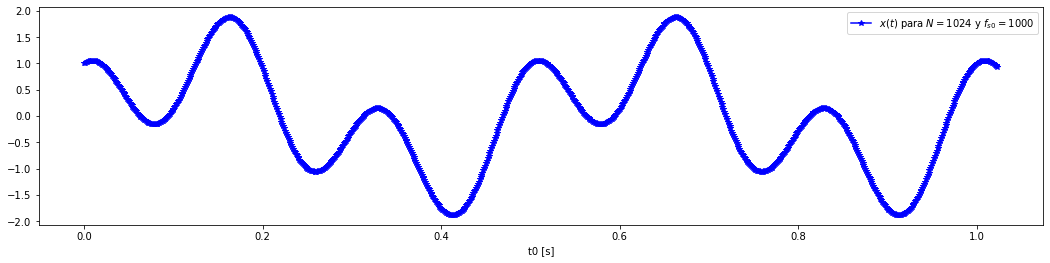

In [25]:
N0 = 2**10  # 1024
fs0 = 1000

step = 1./fs0
init = 0
end = step*N0
t0 = np.arange(init, end, step)

x0 = x(t0)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t0, x0, 'b-*',  label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.legend()
ax.set_xlabel('t0 [s]')

**1.3** Genere una señal  $x_n$ con una frecuencia de muestreo $f_s = 20$ sobre $N = f_s$ muestras (muestreo de 1 segundo).

(20,)


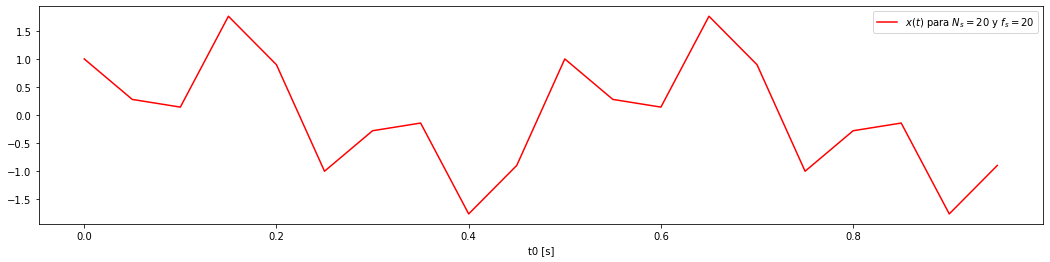

In [26]:
fs = 20
Ns = fs

step = 1./fs
init = 0
end = step * Ns
tn = np.arange(init, end, step)


xn = x(tn)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(tn, xn, 'r-',  label='$x(t)$ para $N_{s}=20$ y $f_{s}=20$')
ax.legend()
ax.set_xlabel('t0 [s]')
print(xn.shape)


**1.4** Grafique simultáneamente $x_0$ y $x_n$. Para $x_n$, use el estilo de trazado ``-o'' para ver la posición de las muestras.

Text(0.5, 0, 't0 [s]')

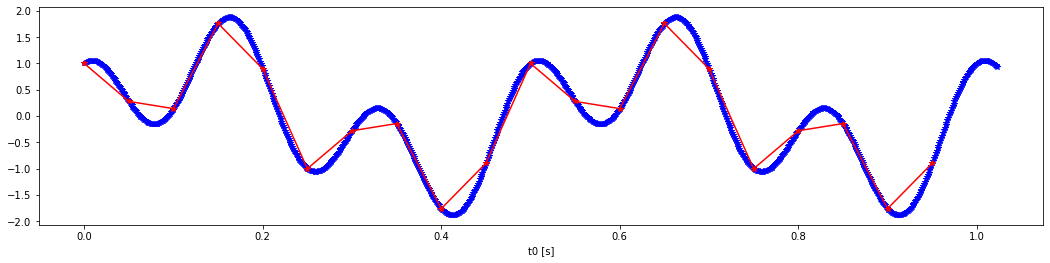

In [27]:
fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(t0, x0, 'b-*',  label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.plot(tn, xn, 'r-*',  label='$x(t)$ para $N=20$ y $f_{s}=20$')
ax.set_xlabel('t0 [s]')

1.2 Reconstrucción de Señales

1. Para que $x(t)$ pueda reconstruirse a partir de las muestras es necesaria una frecuencia de muestreo de al menos $2 f_{\text{max}}$, donde $f_{\text{max}}$ es la máxima frecuencia de la señal $x$. En nuestro caso $x(t)$ sólo consiste de dos fecuencias $f_0=2 $Hz y $f_1= 6$ Hz. Por lo tanto, basta una frecuencia de muestreo $f_s=12 $Hz.







Text(0.5, 0, 't0 [s]')

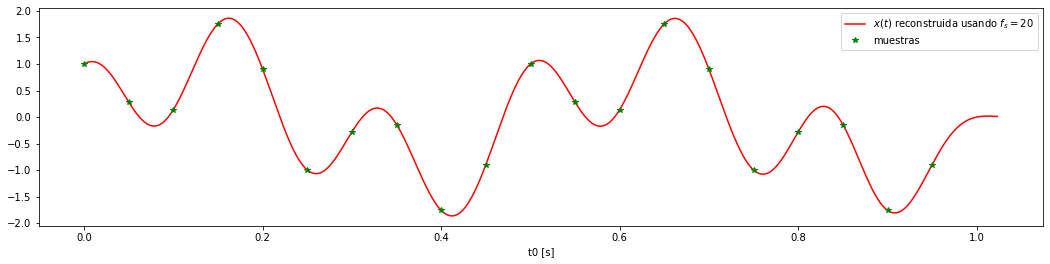

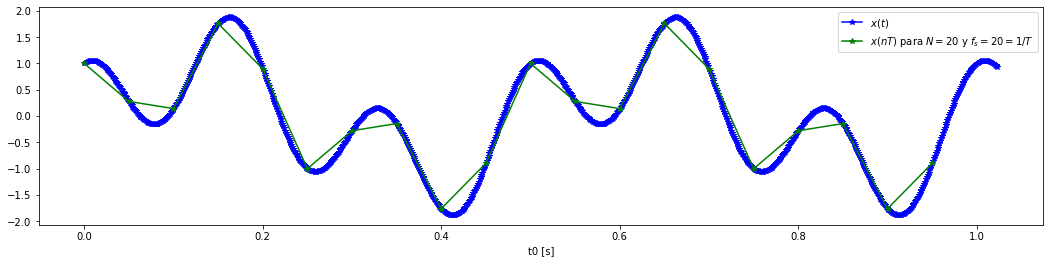

In [44]:

def recSinc(xs,ts,fs,t):
  suma=0
  for n in range(0,fs):
    suma=suma+xs[n]*np.sinc(fs*(t-n/fs))

  return suma


xrec = recSinc(xn,tn,fs,t0)

fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(t0, xrec, 'r-',  label='$x(t)$ reconstruida usando $f_s=20$')
ax.plot(tn, xn, 'g*', label='muestras')
ax.legend()
ax.set_xlabel('t0 [s]')

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(t0, x0, 'b-*',  label='$x(t)$')
ax.plot(tn, xn, 'g-*',  label='$x(nT)$ para $N=20$ y $f_{s}=20=1/T$')
ax.legend()
ax.set_xlabel('t0 [s]')


3. Se observa que en el borde de la ventana de muestreo hay una distorsión de la señal reconstruida.  

4. Si la frecuencia de muestreo disminuye a la mitad, es decir, $f_s=10$, entonces se obtiene la siguiente reconstrucción



Text(0.5, 0, 't0 [s]')

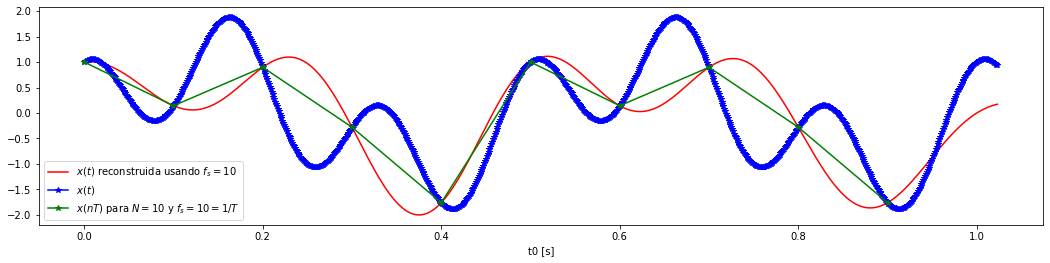

In [47]:
Ns2 = 10

step2 = 1./10
init2 = 0
end2 = step2 * Ns2
tn2 = np.arange(init2, end2, step2)

xn2 = x(tn2)

xrec2 = recSinc(xn2,tn2,10,t0)

fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(t0, xrec2, 'r-',  label='$x(t)$ reconstruida usando $f_s=10$')
ax.plot(t0, x0, 'b-*',  label='$x(t)$')
ax.plot(tn2, xn2, 'g-*',  label='$x(nT)$ para $N=10$ y $f_{s}=10=1/T$')
ax.legend()
ax.set_xlabel('t0 [s]')



En este caso la reconstrucción no es perfecta, es decir, la señal reconstruida es muy distinta de la señal original. 

 Ejercicio 3 - Generacion de señales de audio
 ---------------

1. En esta parte trabajaremos con secuencias de audio.
2. Para hacer eso usaremos *librosa* para cargar y guardar archivos en formato .wav. 
3. También es posible escuchar audio directamente en Python usando la libreria de manipulacion audio *sounddevice* que se puede instalar con pip o conda.

*Nota: cuando se trabaja en un ambiente virtual o en un subsistema como WSL (Windows Subsystem Linux) es mas complicado, pero no imposible, escuchar audio directamente desde una consola Python o un notebook Jupyter, pues se requiere crear un servidor audio para que el sistema hosted pueda acceder a la tarjeta de sonido del sistema host.* 

En esta seccion las señales generadas solo seran escuchadas y trazadas, pero estudiaremos sus componentes de frecuencia en el siguiente TP.

**3.1** Genere 1 segundo de una onda sinusoidal de magnitud $0.5$ y de frecuencia $f_0 = 425$Hz muestreada a
$fs = 8000$Hz. Guardelo como un archivo *.wav* y escuche el archivo o escuche directamente la señal desde
python. Este es el tono de marcado de los teléfonos europeos.

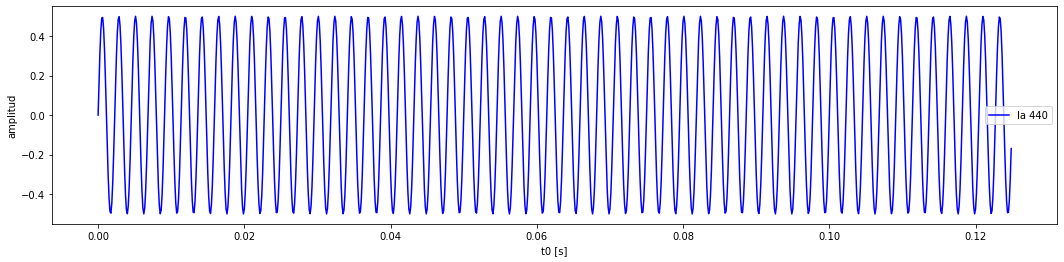

In [52]:
def nota(a, f, t):
    return a*np.sin(2*np.pi*f*t)


tw = np.arange(0, 1, 1./8000)
aw = 0.5
fw = 440

la440 = nota(a=aw, f=fw, t=tw)


wavfile.write(filename='la440.wav', rate=8000, data=la440)

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(tw[:1000], la440[:1000], 'b-',  label='la 440')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')
ax.legend()

**3.2** Es posible generar notas musicales a partir de su numero MIDI m donde la frecuencia se expresa como

$$f_m = 440 · 2^{\frac{m-69}{12}}$$.

Vemos que hay $12$ semitonos para pasar de una nota a su octava.

La nota MIDI $m = 69$ es la LA 4 en notacion europea y es el estandar de tono utilizado para afinar instrumentos para conciertos.


Implemente una funcion *def getNote (m, fs, l)* que devuelve la nota $m$ tocada durante $l$ segundos a la frecuencia $f_s$.

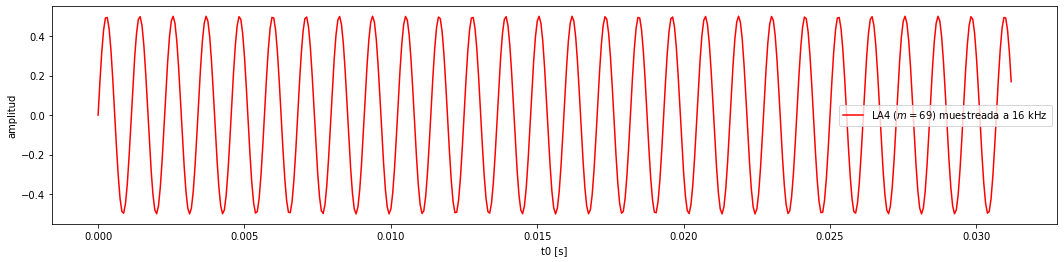

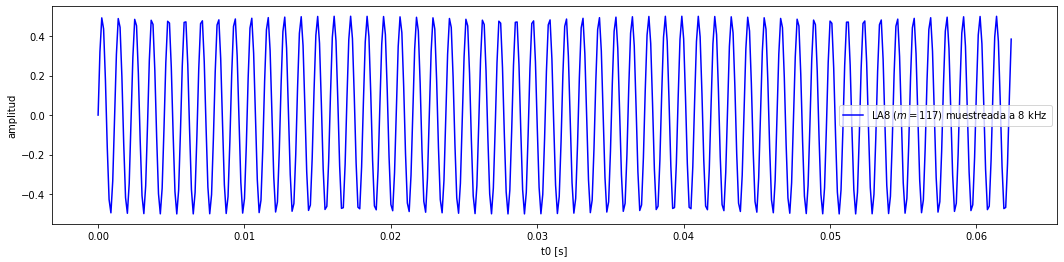

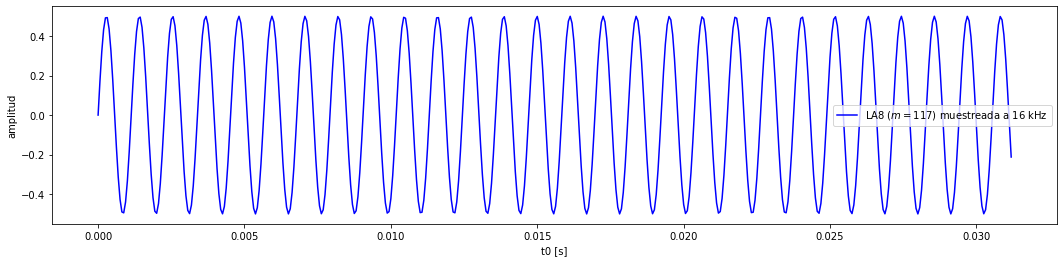

In [67]:
def getNote (m, fs, l):
    t = np.arange(0, l, 1./fs)
    f = 440 * 2^(np.int32((m-69)/12))
    return nota(a=.5, f=f, t=t)

wavfile.write(filename='*A4_16kHz.wav', rate=8000, data=getNote(m=69, fs=16000, l=2))
wavfile.write(filename='*A8_8kHz.wav', rate=8000, data=getNote(m=117, fs=8000, l=2))



ta4 = np.arange(0, 2, 1./16000)
la4=getNote(m=69, fs=16000, l=2)

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(ta4[:500], la4[:500], 'r-',  label='LA4 $(m=69)$ muestreada a 16 kHz')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')
ax.legend()


ta8 = np.arange(0, 2, 1./8000)
la8=getNote(m=117, fs=8000, l=2)

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(ta8[:500], la8[:500], 'b-',  label='LA8 $(m=117)$ muestreada a 8 kHz')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')
ax.legend()

ta8_8 = np.arange(0, 2, 1./16000)
la8_8=getNote(m=117, fs=16000, l=2)

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(ta8_8[:500], la8_8[:500], 'b-',  label='LA8 $(m=117)$ muestreada a 16 kHz')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')
ax.legend()


Al muestrear la señal LA8 a 8 kHz se tiene que la frecuencia $f_{117}=7040$ es muy cercana a la frecuencia de muestreo, lo cual produce una distorsión en la reconstrucción de la señal. La señal reconstruida parece tener una mayor frecuencia que la frecuencia real $f_{117}.$ Esto se soluciona al muestrear a 16 kHz, ya que esta frecuencia es mayor que $2 f_{117}.$

4. Codifique una secuencia de concatenación de notas $[70,72,68,56,63]$ (1 segundo cada una) y guarde la secuencia como archivo "seq.wav". ¿Le suena la secuencia?

In [62]:
wavfile.write(filename='A70_16kHz.wav', rate=16000, data=getNote(m=70, fs=16000, l=1))
wavfile.write(filename='A72_16kHz.wav', rate=16000, data=getNote(m=72, fs=16000, l=1))
wavfile.write(filename='A68_16kHz.wav', rate=16000, data=getNote(m=68, fs=16000, l=1))
wavfile.write(filename='A56_16kHz.wav', rate=16000, data=getNote(m=56, fs=16000, l=1))
wavfile.write(filename='A63_16kHz.wav', rate=16000, data=getNote(m=63, fs=16000, l=1))





No me suena conocida. Parece el tono de ocupado. 

5. La saturación puede ocurrir cuando los amplificadores alcanzan su máxima amplitud. El efecto de la saturación puede ser reproducido usando un "clipeo" en un seno.

Compare la señal de la nota $m=69$ a $440 \mathrm{~Hz}$ para diferentes valores de recorte. Guarde la nota usando el "clipeo" en un archivo "A4clip.wav". ¿Cual es el efecto de la saturación en el contenido frecuencial de la señal?

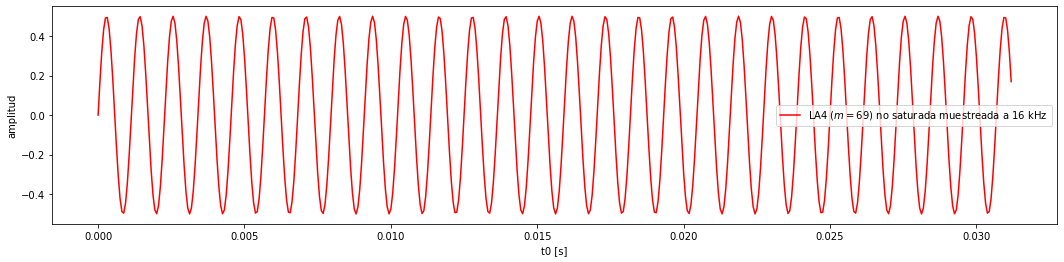

In [77]:


wavfile.write(filename='*A4_16kHz.wav', rate=8000, data=getNote(m=69, fs=16000, l=2))
wavfile.write(filename='*A8_8kHz.wav', rate=8000, data=getNote(m=117, fs=8000, l=2))



ta_clip = np.arange(0, 2, 1./16000)
A4_nclip=getNote(m=69, fs=16000, l=2)

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(ta_clip[:500], A4_nclip[:500], 'r-',  label='LA4 $(m=69)$ no saturada muestreada a 16 kHz')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')
ax.legend()

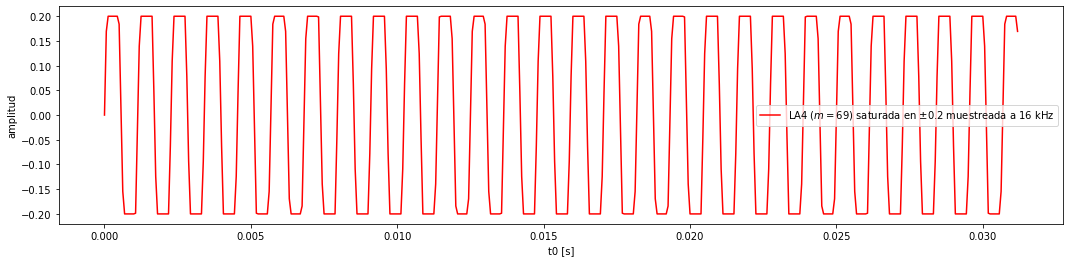

In [79]:
A4_clip = np.clip(A4_nclip[:500], a_min = -0.2, a_max = 0.2)

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(ta_clip[:500], A4_clip[:500], 'r-',  label='LA4 $(m=69)$ saturada en $\pm 0.2$ muestreada a 16 kHz')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')
ax.legend()

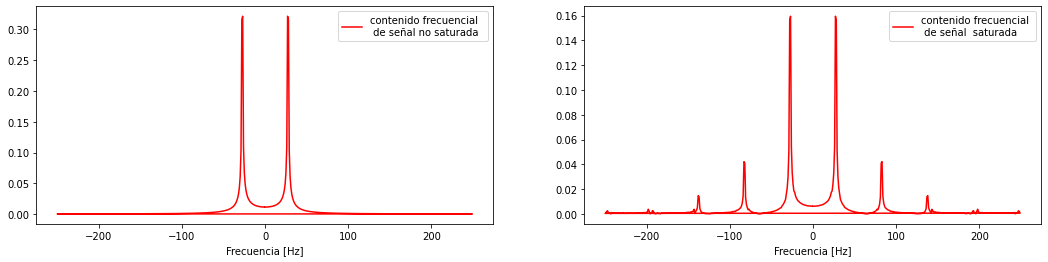

In [97]:

from scipy.fft import fft, fftfreq


yf = fft(A4_clip[:500])
xf = fftfreq(500, 1/500)[:500]

yfn = fft(A4_nclip[:500])
xfn = fftfreq(500, 1/500)[:500]



fig, ax = plt.subplots(1, 2,figsize=(18,4))
ax[0].plot(xfn, 2.0/500 * np.abs(yfn[0:500]), 'r-',  label='contenido frecuencial  \n de señal no saturada')
ax[0].set_xlabel('Frecuencia [Hz]')
ax[0].legend()

ax[1].plot(xf, 2.0/500 * np.abs(yf[0:500]), 'r-',  label='contenido frecuencial \n de señal  saturada')
ax[1].set_xlabel('Frecuencia [Hz]')
ax[1].legend()



Se observa que la saturación de la señal genera armónicos adicionales.

6. Genere la señal
$$
x(t)=\sin \left(2 \pi\left(\omega_{0} t+\frac{c}{2} t^{2}\right)\right)
$$
con $f_{0}=100 \mathrm{~Hz}$ y $c=500$ durante 1 segundo a una frecuencia de muestreo $f_{s}=8000 \mathrm{~Hz}$. Esta señal es llama "chirp" y corresponde a una modulación de frecuencia. Guarde la señal en el archivo "chirp.wav".

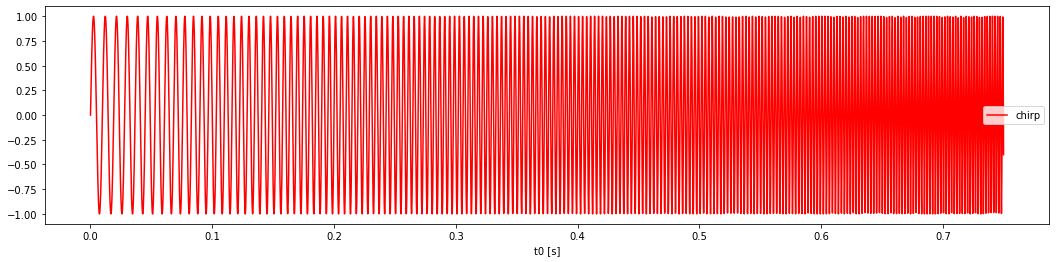

In [100]:
def chirp(w0, c, t):
    return np.sin(2*np.pi*(w0*t+0.5*c*np.power(t,2)))


tch = np.arange(0, 1, 1./8000)

w0 = 100

c=500


chirp_signal = chirp(w0, c, tch)


wavfile.write(filename='chirp.wav', rate=8000, data=chirp_signal )


fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(tch[:6000], chirp_signal[:6000], 'r-',  label='chirp')
ax.set_xlabel('t0 [s]')
ax.legend()
